In [70]:
import pandas as pd
import numpy as np
import math
import json
%matplotlib inline
import seaborn as sns
# read in the json files

In [35]:
df_case=pd.read_csv('intermediate_file/customer_converted.csv')

In [36]:
df_case.head()

,id,event,time,offer_id,amount,reward,difficulty,duration,offer_type,email,...,social,web,age,income,year,F,M,O,month,day
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,5.0,168.0,bogo,1.0,...,0.0,1.0,75,100000.0,2017,1,0,0,5,9
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,5.0,168.0,bogo,1.0,...,0.0,1.0,75,100000.0,2017,1,0,0,5,9
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,NaN,19.89,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,75,100000.0,2017,1,0,0,5,9
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,5.0,168.0,bogo,1.0,...,0.0,1.0,75,100000.0,2017,1,0,0,5,9
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,NaN,17.78,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,75,100000.0,2017,1,0,0,5,9


In [37]:
unqiue_users=df_case["id"].unique()

clean_data func is used to dervie the offer which wee received and viwed and completed in sequence

In [39]:
def clean_data(j):
    user_offer={}
    df_user=df_case[df_case["id"] == str(j)]
    val=df_user[df_user['event'] == 'offer completed']['offer_id'].values
    new_list=[]
    for i in set(val):
        received_time=df_user[(df_user['offer_id'] == i) & (df_user['event'] == 'offer received')]['time'].values
        duration=df_user[(df_user['offer_id'] == i) & (df_user['event'] == 'offer received')]['duration'].values
        viewed_time=df_user[(df_user['offer_id'] == i) & (df_user['event'] == 'offer viewed')]['time'].values
        completed_time=df_user[(df_user['offer_id'] == i) & (df_user['event'] == 'offer completed')]['time'].values
        for k in range(1):
            total_diff=(completed_time[k] - received_time[k])
            
            if  total_diff <= duration[0]:
                if len(viewed_time) >=1 :
                    if (viewed_time[k] > received_time[k]) and (viewed_time[k] < completed_time[k]):
                        new_list.append(i)
    user_offer[j]=new_list
    return(user_offer)
p=list(map(lambda x:clean_data(x),unqiue_users))

In [40]:
for i in p:
    for key, value in i.items():
        print(key,value)
    break;
    

78afa995795e4d85b5d9ceeca43f5fef ['9b98b8c7a33c4b65b9aebfe6a799e6d9']


In [41]:
df_case.shape

(272762, 21)

Creating a decision column we can track the offers which we completed by the customers. Further used that as our dependent variable for training. 

In [42]:
df_case["decision"]=np.zeros((272762,1))
df_received= df_case[df_case['event'] == 'offer received']
df_new=df_received.copy()

In [43]:
df_received.head()

,id,event,time,offer_id,amount,reward,difficulty,duration,offer_type,email,...,web,age,income,year,F,M,O,month,day,decision
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,5.0,168.0,bogo,1.0,...,1.0,75,100000.0,2017,1,0,0,5,9,0.0
5,78afa995795e4d85b5d9ceeca43f5fef,offer received,168,5a8bc65990b245e5a138643cd4eb9837,NaN,0.0,0.0,72.0,informational,1.0,...,0.0,75,100000.0,2017,1,0,0,5,9,0.0
10,78afa995795e4d85b5d9ceeca43f5fef,offer received,408,ae264e3637204a6fb9bb56bc8210ddfd,NaN,10.0,10.0,168.0,bogo,1.0,...,0.0,75,100000.0,2017,1,0,0,5,9,0.0
12,78afa995795e4d85b5d9ceeca43f5fef,offer received,504,f19421c1d4aa40978ebb69ca19b0e20d,NaN,5.0,5.0,120.0,bogo,1.0,...,1.0,75,100000.0,2017,1,0,0,5,9,0.0
18,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,2.0,10.0,168.0,discount,1.0,...,1.0,68,70000.0,2018,0,1,0,4,26,0.0


In [45]:
c=0
for index, row in df_received.iterrows():
    for i in p:
        for key, value in i.items():
            if row['id'] == key:
                if row['offer_id'] in value:
                    df_new.loc[index, 'decision'] =1

In [47]:
df_new.head()

,id,event,time,offer_id,amount,reward,difficulty,duration,offer_type,email,...,web,age,income,year,F,M,O,month,day,decision
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,5.0,168.0,bogo,1.0,...,1.0,75,100000.0,2017,1,0,0,5,9,1.0
5,78afa995795e4d85b5d9ceeca43f5fef,offer received,168,5a8bc65990b245e5a138643cd4eb9837,NaN,0.0,0.0,72.0,informational,1.0,...,0.0,75,100000.0,2017,1,0,0,5,9,0.0
10,78afa995795e4d85b5d9ceeca43f5fef,offer received,408,ae264e3637204a6fb9bb56bc8210ddfd,NaN,10.0,10.0,168.0,bogo,1.0,...,0.0,75,100000.0,2017,1,0,0,5,9,0.0
12,78afa995795e4d85b5d9ceeca43f5fef,offer received,504,f19421c1d4aa40978ebb69ca19b0e20d,NaN,5.0,5.0,120.0,bogo,1.0,...,1.0,75,100000.0,2017,1,0,0,5,9,0.0
18,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,2.0,10.0,168.0,discount,1.0,...,1.0,68,70000.0,2018,0,1,0,4,26,0.0


In [49]:
df_new.to_csv('intermediate_file/output.csv',index=False)

In [135]:
df=pd.read_csv('data/output1.csv')

In [136]:
df.columns

Index(['id', 'event', 'time', 'offer_id', 'amount', 'reward', 'difficulty',
       'duration', 'offer_type', 'email', 'mobile', 'social', 'web', 'age',
       'income', 'year', 'F', 'M', 'O', 'month', 'day', 'decision'],
      dtype='object')

In [137]:
one_hot = pd.get_dummies(df['offer_type'])
df=pd.concat([df,one_hot],axis=1)
df=df.drop(['offer_type'],axis=1)


In [138]:
df.head()

,id,event,time,offer_id,amount,reward,difficulty,duration,email,mobile,...,year,F,M,O,month,day,decision,bogo,discount,informational
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,5.0,168.0,1.0,1.0,...,2017,1,0,0,5,9,1.0,1,0,0
1,78afa995795e4d85b5d9ceeca43f5fef,offer received,168,5a8bc65990b245e5a138643cd4eb9837,NaN,0.0,0.0,72.0,1.0,1.0,...,2017,1,0,0,5,9,0.0,0,0,1
2,78afa995795e4d85b5d9ceeca43f5fef,offer received,408,ae264e3637204a6fb9bb56bc8210ddfd,NaN,10.0,10.0,168.0,1.0,1.0,...,2017,1,0,0,5,9,0.0,1,0,0
3,78afa995795e4d85b5d9ceeca43f5fef,offer received,504,f19421c1d4aa40978ebb69ca19b0e20d,NaN,5.0,5.0,120.0,1.0,1.0,...,2017,1,0,0,5,9,0.0,1,0,0
4,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,2.0,10.0,168.0,1.0,1.0,...,2018,0,1,0,4,26,0.0,0,1,0


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66501 entries, 0 to 66500
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             66501 non-null  object 
 1   event          66501 non-null  object 
 2   time           66501 non-null  int64  
 3   offer_id       66501 non-null  object 
 4   amount         0 non-null      float64
 5   reward         66501 non-null  float64
 6   difficulty     66501 non-null  float64
 7   duration       66501 non-null  float64
 8   email          66501 non-null  float64
 9   mobile         66501 non-null  float64
 10  social         66501 non-null  float64
 11  web            66501 non-null  float64
 12  age            66501 non-null  int64  
 13  income         66501 non-null  float64
 14  year           66501 non-null  int64  
 15  F              66501 non-null  int64  
 16  M              66501 non-null  int64  
 17  O              66501 non-null  int64  
 18  month 

In [140]:
df=df.drop(['id','event','offer_id','email','amount'],axis=1)

In [141]:
df=df.drop(['informational'],axis=1)

In [142]:
df=df.drop(['time'],axis=1)

<AxesSubplot:>

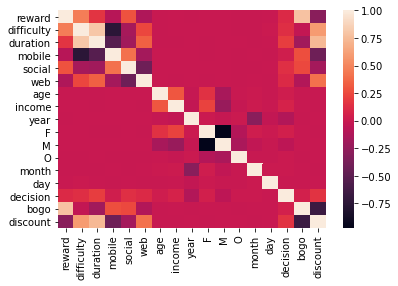

In [147]:
import seaborn as sns
sns.heatmap(df.corr())

In [145]:
df['M'].corr(df['F'])

-0.972117254256477

In [148]:
df.to_csv('intermediate_file/new_output.csv',index=False)